<a href="https://colab.research.google.com/github/ChhaviC/comp3132/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03

The following assignment is divided in two parts:
- Part A: Run the cells that have already been coded for you to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 1a, 1b, 2a, 2b
- Part B:  Run the cells that have already been coded for you to train the given Neural Network and then respond to the questions 03 to 10 in your video

**Note:**

Coding: 5%
video presentation: 5%
Total: 10%
But without YouTube presentation you receive no mark for the submission. In short, only submissions with YouTube link will be marked.

# PART A

## Image Convolution

In [ ]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [ ]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [ ]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [ ]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




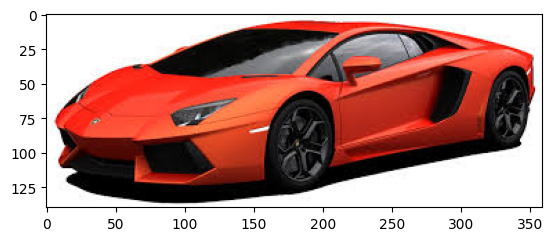

In [ ]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [ ]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


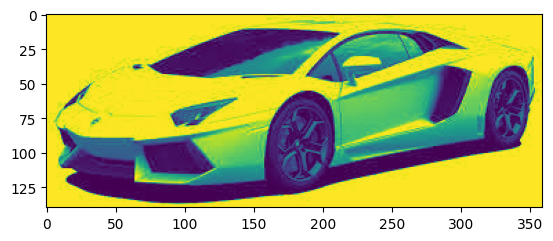

In [ ]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
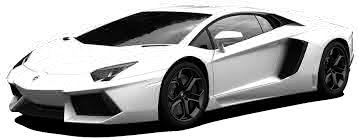

In [ ]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

## Convolution with 2-D Kernels

How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [ ]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [ ]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [ ]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

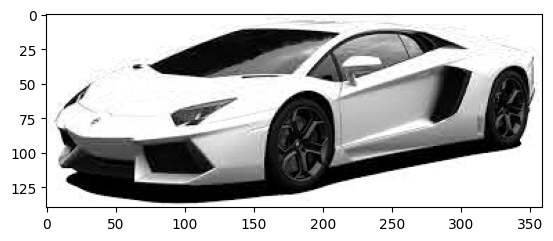

In [ ]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [ ]:
# Define a function to trim out the values between 0-255 range.
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [ ]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')

    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    transformed_array = np.zeros(image_array_2d.shape)

    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

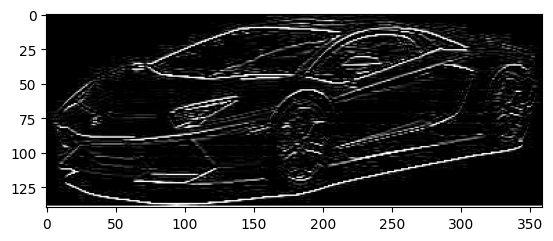

In [ ]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

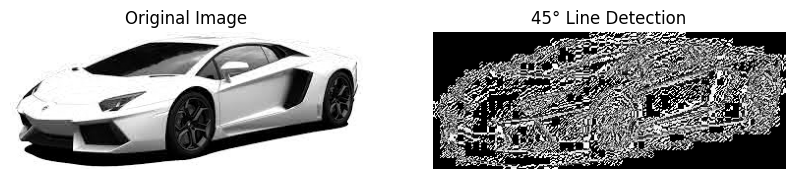

In [ ]:
# Type your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define the 45-degree line detection kernel
kernel_45 = np.array([
    [-1, -1,  2],
    [-1,  2, -1],
    [ 2, -1, -1]
])

# Apply convolution
filtered_image = convolve(input_img_arr, kernel_45)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_img_arr, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("45° Line Detection")
plt.axis("off")

plt.show()



#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

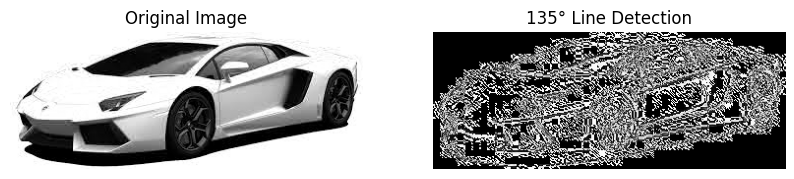

In [ ]:
# Type your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define the 135-degree line detection kernel
kernel_135 = np.array([
    [ 2, -1, -1],
    [-1,  2, -1],
    [-1, -1,  2]
])

# Apply convolution
filtered_image_135 = convolve(input_img_arr, kernel_135)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_img_arr, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Filtered image (135-degree line detection)
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_135, cmap='gray')
plt.title("135° Line Detection")
plt.axis("off")

plt.show()



## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [ ]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

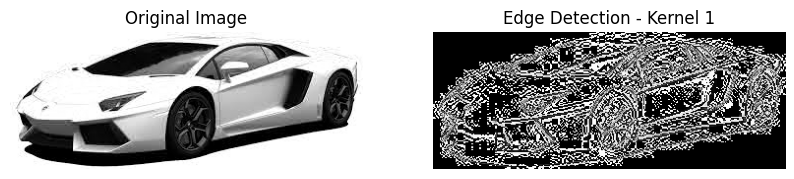

In [ ]:
# Type your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define the edge detection kernel
edge_kernel_1 = np.array([
    [1,  0, -1],
    [0,  0,  0],
    [-1, 0,  1]
])

# Apply convolution
filtered_image_edge1 = convolve(input_img_arr, edge_kernel_1)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_img_arr, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Filtered image (Edge Detection)
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_edge1, cmap='gray')
plt.title("Edge Detection - Kernel 1")
plt.axis("off")

plt.show()


#### 02-b:

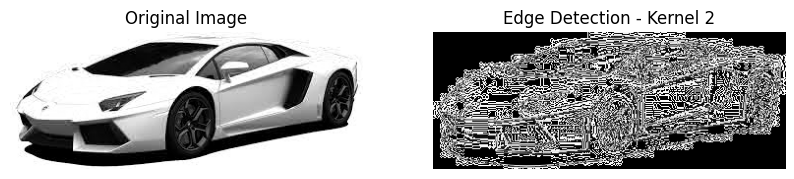

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define the edge detection kernel
edge_kernel_2 = np.array([
    [ 0,  1,  0],
    [ 1, -4,  1],
    [ 0,  1,  0]
])

# Apply convolution
filtered_image_edge2 = convolve(input_img_arr, edge_kernel_2)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_img_arr, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Filtered image (Edge Detection)
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_edge2, cmap='gray')
plt.title("Edge Detection - Kernel 2")
plt.axis("off")

plt.show()


#### 02-c:

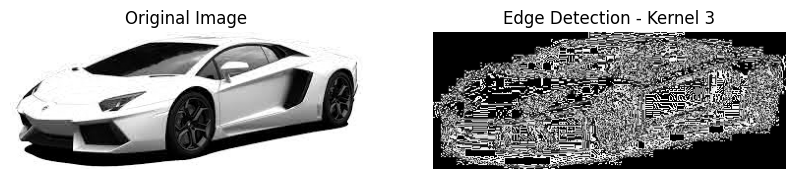

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define the edge detection kernel
edge_kernel_3 = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Apply convolution
filtered_image_edge3 = convolve(input_img_arr, edge_kernel_3)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_img_arr, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Filtered image (Edge Detection)
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_edge3, cmap='gray')
plt.title("Edge Detection - Kernel 3")
plt.axis("off")

plt.show()


# PART B

## Importing Libraries

In [ ]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [ ]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display a summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

## CustomCallback class for logging

In [ ]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [ ]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [ ]:
# Train the Network with train_images and train_labels
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4832000136375427
Accuracy reached val is 0.5651000142097473

 Finished epoch # 5
Accuracy resched train is 0.7182199954986572
Accuracy reached val is 0.6539000272750854



## Plotting the Results

In [ ]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

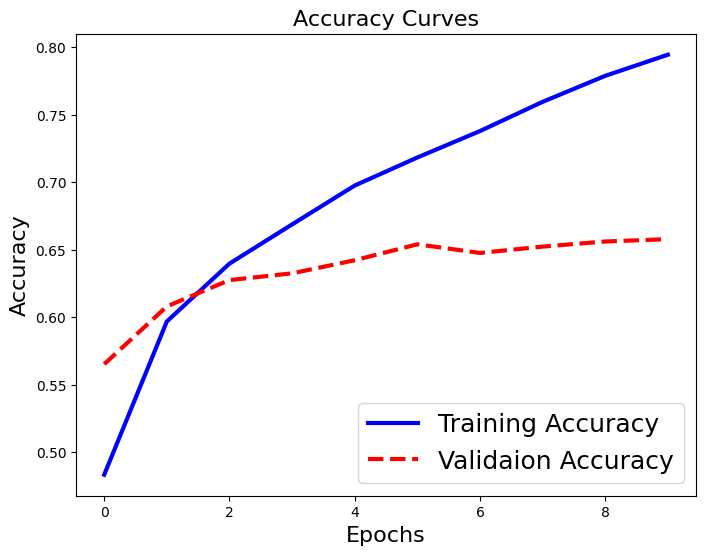

In [ ]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network present signs of overfitting? If so, in which epoch?

Overfitting Analysis
Look at the training and validation loss.

If validation loss starts increasing while training loss keeps decreasing, overfitting has occurred.

Identify the epoch where this starts happening.

#### 04: Write down how many layers this model has and identify their types

Count and Identify Model Layers
Use model.summary() to list all layers.

Note how many layers there are and their types (Conv2D, MaxPooling2D, Dense, Flatten, etc.).



#### 05: Briefly explain what is the purpose of each of those layers

Explain Purpose of Each Layer
Example:

Conv2D: Extracts features from the image.

MaxPooling2D: Reduces spatial size, preventing overfitting.

Flatten: Converts 2D features into a 1D vector.

Dense: Fully connected layers that learn patterns.

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),  # Extra Conv Layer
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. Modify it to add a dropout layer
2. Run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. Once the training is complete, run the following cell containing the ```result_plotting()``` function




In [ ]:
# Reimport libraries and necessary functions
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model with dropout
model_with_dropout = Sequential()

# Add convolutional layers
model_with_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_with_dropout.add(MaxPooling2D(pool_size=(2, 2)))

model_with_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D(pool_size=(2, 2)))

model_with_dropout.add(Flatten())  # Flatten the 2D array to 1D

# Add a Dense layer
model_with_dropout.add(Dense(128, activation='relu'))

# Add Dropout layer (prevent overfitting)
model_with_dropout.add(Dropout(0.5))  # Dropout rate of 50%

# Add output layer
model_with_dropout.add(Dense(10, activation='softmax'))

# Compile the model
model_with_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the results using the result_plotting function
def result_plotting(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy with Dropout')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss with Dropout')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Run the result plotting function
result_plotting(history_with_dropout)


#### 07: Compare the results between the orinal model made using keras.Sequential VS the bigger model with at least 1 extra layer added.  Describe what are the differences between them.

1. Run Both Models:
Original Model: The model as defined initially.

Modified Model: The original model with at least one extra convolutional layer added.

2. Evaluate Performance Metrics:
Accuracy and Loss:

Compare the test accuracy and test loss of both models after training.

In [ ]:
# Evaluate the model's performance on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)


3. Training Results Comparison:
Plot Training and Validation Curves:

Plot the training and validation loss and accuracy for both models using the result_plotting() function:

In [ ]:
# Plotting function example (ensure this is provided or use your custom function)
def result_plotting(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


4. Key Points to Compare:
Accuracy and Loss:

Original Model: Accuracy and loss values.

Modified Model: Higher accuracy, lower loss, or overfitting signs?

Epochs for Convergence:

Did adding layers affect how quickly the model converged?

5. Describe the Differences:
Impact of Extra Layer:

Accuracy: The modified model might show improved accuracy if the extra layer helps the model learn more complex features.

Overfitting: Additional layers can increase the risk of overfitting, especially if the validation accuracy starts to drop after some epochs.

Training Time: The modified model may take longer to train due to the increased complexity.

Generalization: The added layer could potentially lead to better generalization, or it could make the model too complex.



In [ ]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works. And briefly explain in your video in your own words.

The purpose of a dropout layer is to prevent overfitting in neural networks by randomly "dropping out" (setting to zero) a percentage of the neurons during training. This ensures that the model doesn't rely too heavily on any specific neuron and forces the network to learn more robust and generalized patterns.

How it works:
During training, a fraction of the neurons in the layer are randomly set to zero at each step, based on the specified dropout rate (e.g., 0.5 means 50% of the neurons are dropped out).

This forces the model to learn redundant representations of the data, making it less sensitive to small changes and improving its generalization on unseen data.

Dropout is typically used only during training, and the full network is used during inference or testing. During testing, no neurons are dropped, but the weights are scaled down by the dropout rate to compensate for the missing neurons during training.

Submission Instructions:
- YOU MUST SUBMIT A LINK TO YOUR ONLINE VIDEO (Youtube, Vimeo, etc) as a COMENTS SUBMISSION SECTION on your D2L SUBMISSION. Omitting this comment will result in a 0% for your total mark. Video should be between 5-15 minutes. Please remember to make your video unlisted or public, but it cannot be private. Please verify it's accessible using an incongito tab.  (5%)

- The Assignment03 **ipynb file** that contains all the code. (5%)
